In [2]:
import pandas as pd
import numpy as np

# ORIGINAL DATA FEATURES

In [3]:
CRWU_df = pd.read_csv('./CWRU_Original_data/feature_time_48k_2048_load_1.csv')

In [4]:
CRWU_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2300 entries, 0 to 2299
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   max       2300 non-null   float64
 1   min       2300 non-null   float64
 2   mean      2300 non-null   float64
 3   sd        2300 non-null   float64
 4   rms       2300 non-null   float64
 5   skewness  2300 non-null   float64
 6   kurtosis  2300 non-null   float64
 7   crest     2300 non-null   float64
 8   form      2300 non-null   float64
 9   fault     2300 non-null   object 
dtypes: float64(9), object(1)
memory usage: 179.8+ KB


Maximum

Minimum

Mean

Standard Deviation: It is a measure of how much values vary in a dataset. If the standard deviation is low, it means the values tend to be close to the mean. If the standard deviation is high, it means the values are spread out.

Root Mean Square (RMS): It is a statistical measure of the magnitude of a set of values. It is calculated by taking the square root of the average of the squares of the values.

Skewness: It is a measure of the asymmetry of the distribution of a dataset around its mean. Positive skewness means that the right tail of the distribution is longer, and negative skewness means that the left tail of the distribution is longer.

Kurtosis: It is a measure of the "heaviness" of the tails of a distribution. Positive kurtosis indicates a distribution with heavy or long tails and many extreme values. Negative kurtosis indicates a distribution with short tails and fewer extreme values.

Crest Factor: It is a measure of a dataset that compares the maximum (absolute) peak to its RMS (Root Mean Square). It is a useful measure for identifying peaks in the data.

Form Factor: It is a measure that compares the RMS magnitude of a signal to its mean absolute value. It provides information about the shape of the signal waveform.

In [ ]:
CRWU_df['fault'].unique()

array(['Ball_007_1', 'Ball_014_1', 'Ball_021_1', 'IR_007_1', 'IR_014_1',
       'IR_021_1', 'OR_007_6_1', 'OR_014_6_1', 'OR_021_6_1', 'Normal_1'],
      dtype=object)

In [10]:
# Data example
CRWU_df.loc[CRWU_df['fault']=='OR_021_6_1'].head()

,max,min,mean,sd,rms,skewness,kurtosis,crest,form,fault
1840,1.6894,-1.5692,0.015410,0.294867,0.295197,0.054816,5.448018,5.722952,19.156364,OR_021_6_1
1841,4.0640,-4.7317,0.013508,0.628321,0.628312,-0.647194,16.473112,6.468119,46.515764,OR_021_6_1
1842,3.3228,-3.3670,0.015683,0.659246,0.659272,-0.142434,6.918813,5.040105,42.038037,OR_021_6_1
1843,4.6766,-4.1959,0.013836,0.698560,0.698527,0.031080,15.328685,6.694950,50.486936,OR_021_6_1
1844,1.8363,-1.8822,0.012977,0.310139,0.310335,0.003678,7.242388,5.917162,23.914503,OR_021_6_1


Each row is calculated for time segments of 2048 points (0.04 seconds at the accelerometer's sampling frequency of 48 kHz). They took the RAW data from B007_1_123.MAT (487,383 samples) and divided it into 229 rows with the statistics.


# RAW Data
Matlab format

This dataset corresponds to the following conditions:

* 1 HP (horsepower) of load applied to the motor
* Shaft rotational speed of 1772 rpm
* Accelerometer sampling frequency of 48 kHz

The test bearings support the motor shaft. Defects were introduced at a single point using electrical discharge machining. The defect diameters in inches (millimeters) are:

* 0.007 inches (0.178 millimeters)
* 0.014 inches (0.356 millimeters)
* 0.021 inches (0.533 millimeters)

There is a time series for each defect located in one of the three parts of the bearing:

* Ball
* Inner race
* Outer race

Acelerometros colocados en diferentes posiciones:
*  Drive end (DE)  
* Fan end (FE)  
* Base (BA)

In [12]:
from scipy.io import loadmat

B007_1_123_mat = loadmat('./CWRU_Original_data/raw_data/B007_1_123.mat')
Time_Normal_1_098_mat = loadmat('./CWRU_Original_data/raw_data/Time_Normal_1_098.mat')


In [13]:
B007_1_123_mat

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN, Created on: Fri Jan 28 11:46:29 2000',
 '__version__': '1.0',
 '__globals__': [],
 'X123_DE_time': array([[-0.04109723],
        [-0.046104  ],
        [-0.02837169],
        ...,
        [ 0.07343262],
        [ 0.04819015],
        [ 0.03838523]]),
 'X123_FE_time': array([[-0.08115455],
        [-0.09759091],
        [-0.08320909],
        ...,
        [ 0.02136727],
        [ 0.00472545],
        [-0.01314909]]),
 'X123RPM': array([[1772]], dtype=uint16)}

X123_DE_time y X123_FE_time son listas de listas.   

In [14]:
for lista in  B007_1_123_mat:
    print(lista)

print('**********')

for lista in  Time_Normal_1_098_mat:
    print(lista)

__header__
__version__
__globals__
X123_DE_time
X123_FE_time
X123RPM
**********
__header__
__version__
__globals__
X098_DE_time
X098_FE_time


In [15]:
# Select only one list from each dataframe to be analyzed
X123_DE_time = B007_1_123_mat['X123_DE_time']
X098_DE_time = Time_Normal_1_098_mat['X098_DE_time']

In [16]:
X123_DE_time_df= pd.DataFrame(X123_DE_time)
X098_DE_time_df = pd.DataFrame(X098_DE_time)

In [17]:
X123_DE_time_df.rename(columns = {0:'acelerometro'}, inplace = True)
X098_DE_time_df.rename(columns = {0:'acelerometro'}, inplace = True)

### Add datetime

In [19]:
start = pd.to_datetime('2023-01-01')

X123_DE_time_df['datetime']= pd.date_range(start, periods=len(X123_DE_time_df), freq= '40ms') # 0.04 segundos = 40 milisegundos
X098_DE_time_df['datetime']= pd.date_range(start, periods=len(X098_DE_time_df), freq= '40ms')

In [21]:
X123_DE_time_df.head()

,acelerometro,datetime
0,-0.041097,2023-01-01 00:00:00.000
1,-0.046104,2023-01-01 00:00:00.040
2,-0.028372,2023-01-01 00:00:00.080
3,0.001252,2023-01-01 00:00:00.120
4,0.033796,2023-01-01 00:00:00.160


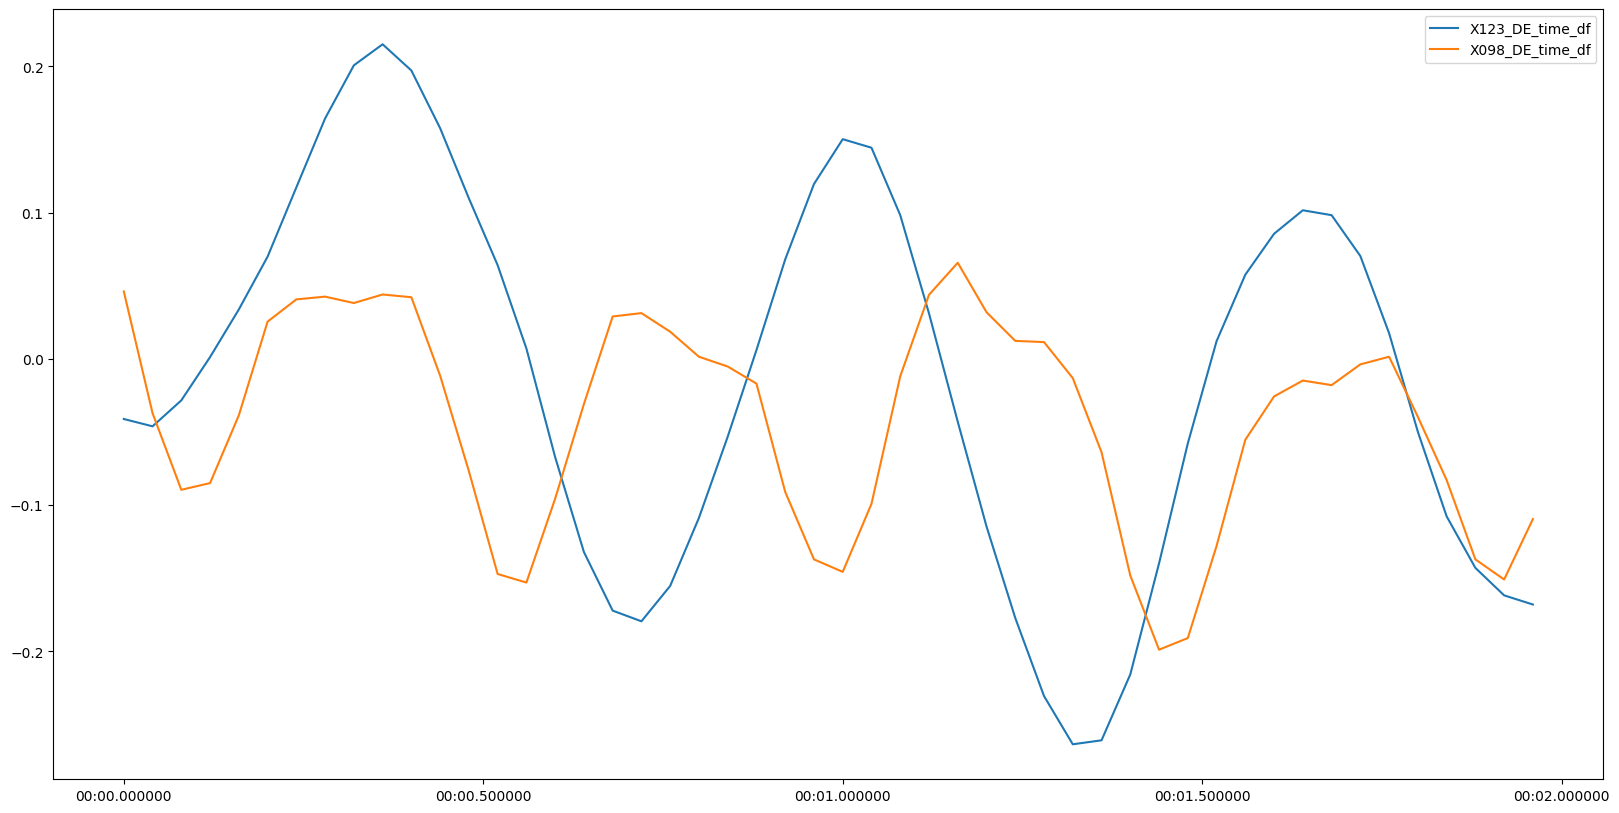

In [22]:
import matplotlib.pyplot as plt
n_muestras = 50

ejex_X123_DE_time_df = X123_DE_time_df['datetime'].iloc[:n_muestras]
ejey_X123_DE_time_df = X123_DE_time_df['acelerometro'].iloc[:n_muestras]


ejex_X098_DE_time_df = X098_DE_time_df['datetime'].iloc[:n_muestras]
ejey_X098_DE_time_df = X098_DE_time_df['acelerometro'].iloc[:n_muestras]

fig,ax = plt.subplots(figsize=(20,10))
ax.plot(ejex_X123_DE_time_df, ejey_X123_DE_time_df, label='X123_DE_time_df')
ax.plot(ejex_X098_DE_time_df, ejey_X098_DE_time_df, label='X098_DE_time_df')

ax.legend()

plt.show()


# Signal data and signal data labels

In [24]:
data = np.load(f'./CWRU_Original_data/signal_data.npy')
labels = np.load(f'./CWRU_Original_data/signal_data_labels.npy')

In [27]:
print(data.shape)
print(labels.shape)

(2800, 1600)
(2800,)


The data contains 2800 time series. 

Each time series has 1600 samples.

In [33]:
unique_labels, counts = np.unique(labels, return_counts = True)

for label, count in zip(unique_labels, counts):
    print(f'label {label} = {count} time series')

label 0.0 = 280 time series
label 1.0 = 280 time series
label 2.0 = 280 time series
label 3.0 = 280 time series
label 4.0 = 280 time series
label 5.0 = 280 time series
label 6.0 = 280 time series
label 7.0 = 280 time series
label 8.0 = 280 time series
label 9.0 = 280 time series


The time series are labeled from 0 to 9. 

0 is normal operation, while the other labels indicate different faults. 

It is a balanced dataset, each label contains 280 time series.

In [37]:
def plot(data):
     # Plot
    plt.figure(figsize=(20, 5))
    for fila in data:
      plt.plot(list(range(0,len(fila))), fila, 'b',alpha = 0.2)
    plt.xlabel("Sample")
    plt.ylabel("Value")
    plt.grid()
    plt.show()

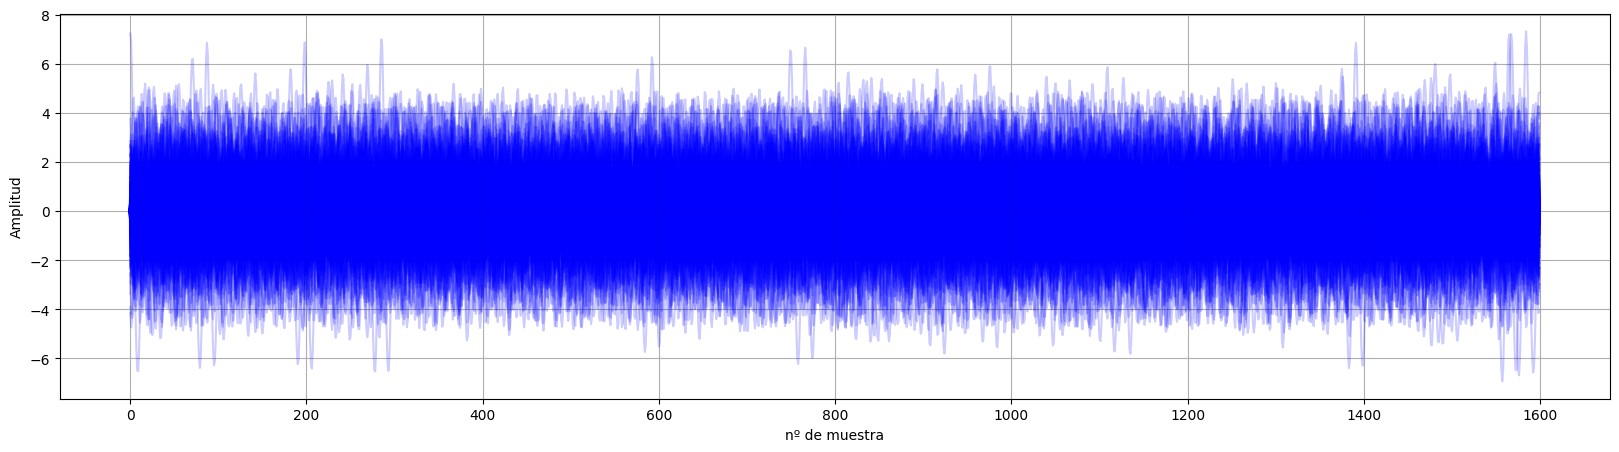

In [36]:
# All data
plot(data)

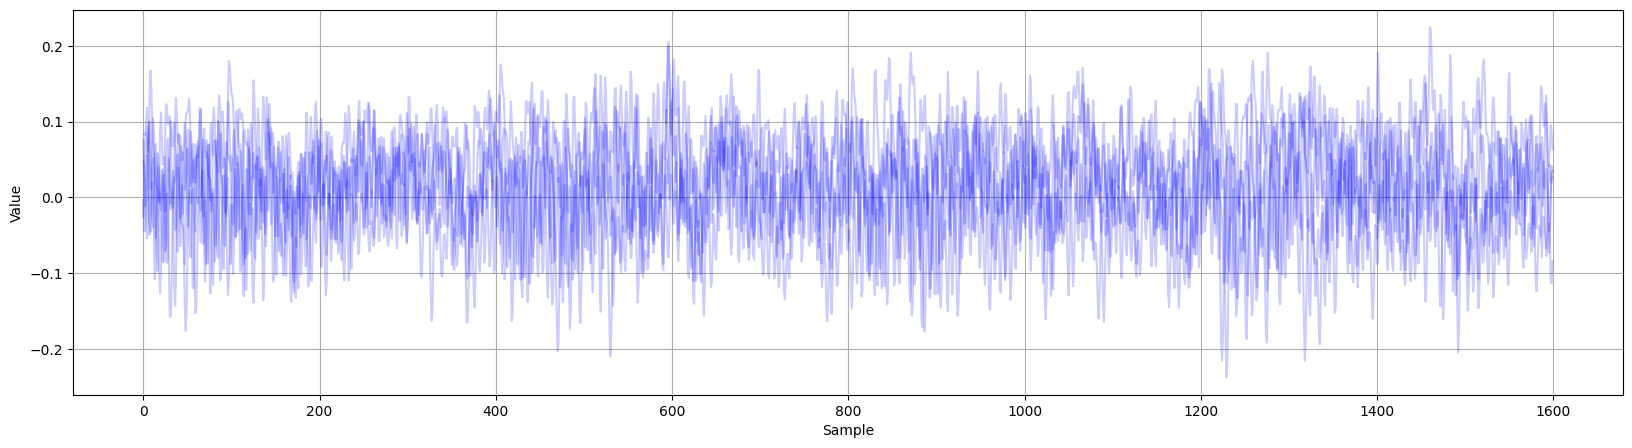

In [52]:
# Label 0 examples
plot(data[:5])

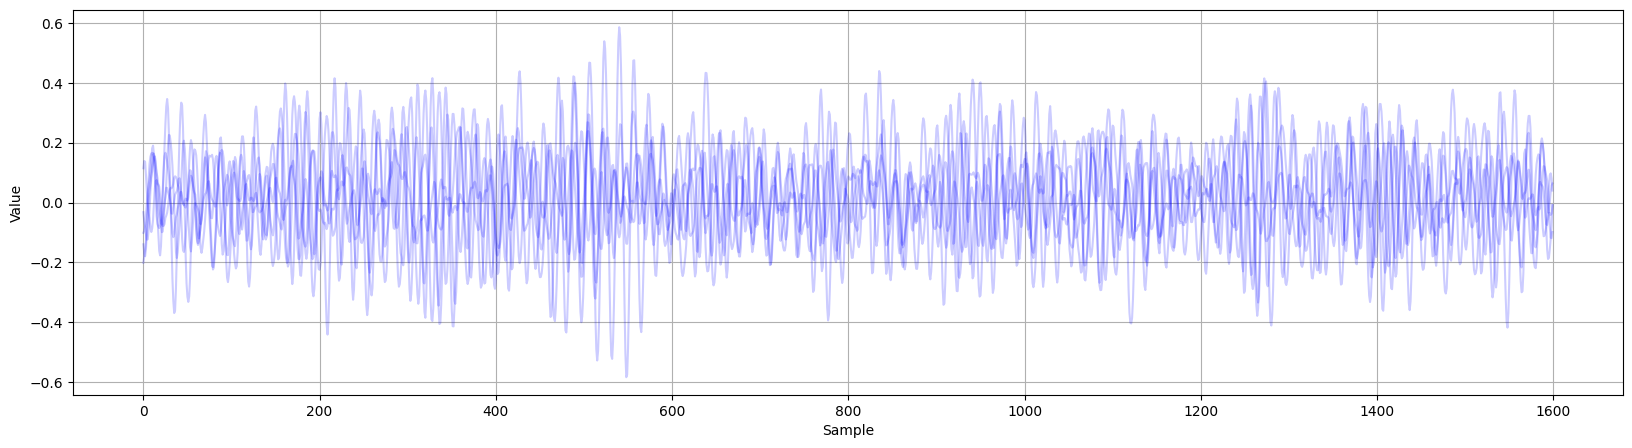

In [53]:
# Label 1 examples
plot(data[280:285])

## In conclusion: signal_data and signal_data_labels will be selected for this project.